**© 2024 Scott A. Bruce. Do not distribute.**

# Data analytics with pandas and NumPy

This notebook follows Chapter 10 in the [Python Workshop textbook](https://search.ebscohost.com/login.aspx?direct=true&db=edsool&AN=edsool.9781804610619&site=eds-live&scope=site&authtype=shib&custid=s8516548).  Herein, we will use the `NumPy` and `pandas` packages for data analysis in Python.  Taken together, `pandas` and `NumPy` are masterful at handling big data. They are built for speed, efficiency, readability, and ease of use.

**`pandas`** provide you with a unique framework to view and modify data. Pandas handles all data-related tasks such as creating DataFrames, importing data, scraping data from the web, merging data, pivoting, concatenating, and more.

**`NumPy`**, short for Numerical Python, is more focused on computation. NumPy interprets the rows and columns of pandas DataFrames as matrices in the form of NumPy arrays. When computing descriptive statistics such as the mean, median, mode, and quartiles, NumPy is blazingly fast.

Another key player in data analysis is **`Matplotlib`**, a graphing library that handles scatter plots, histograms, regression lines, and more. The importance of data graphs cannot be overstated since most non-technical professionals use them to interpret results.

## 0. Working on Colab

You have (at least) two options for working with Jupyter notebooks provided throughout this course.  I would suggest the first option unless you feel strongly against it.

1. In the cloud on Google Colab (preferred).

  This ensures we all have the same computing environment and aren't wasting personal compute resources. To get notebooks (.ipynb files) working on Colab, follow these steps.

  1. Download the file from Canvas and upload it to Google drive https://drive.google.com.

  2. Right click the .ipynb file and click "+ connect more apps".

  3. Scroll down and click Google "Colaboratory" and select install (this doesn't install anything to your computer).

  4. You will now be able to open any .ipynb files in your Google drive in Colab and immediately begin running Python code.

  5. If this doesn't work please ask me after class and we'll get it working.  

2. Locally on your own Python installation.

There are a lot of ways to do this, but the simplest is to install anaconda https://www.anaconda.com

## 1. NumPy and basic stats

NumPy is designed to handle big data swiftly. It includes the following essential components according to the NumPy documentation:

- A powerful n-dimensional array object
- Sophisticated (**broadcasting**) functions
- Tools for integrating C/C++ and Fortran code
- Useful linear algebra, Fourier transform, and random number capabilities

From NumPy documentation: "The term **broadcasting** describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the *smaller* array is “broadcast” across the *larger* array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation."

NumPy arrays are the basic elements of the NumPy package. NumPy arrays are designed to handle arrays of any dimension.

NumPy arrays can be indexed easily and can have many types of data, such as `float`, `int`, `string`, and `object`, but the **types must be consistent** to improve speed.


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Quick Example: Broadcasting is usually, but not always faster

From https://numpy.org/doc/stable/user/basics.broadcasting.html

"Broadcasting is a powerful tool for writing short and usually intuitive code that does its computations very efficiently in C. However, there are cases when broadcasting uses unnecessarily large amounts of memory for a particular algorithm. In these cases, it is better to write the algorithm’s outer loop in Python. This may also produce more readable code, as algorithms that use broadcasting tend to become more difficult to interpret as the number of dimensions in the broadcast increases."

See the following example and explanation from https://stackoverflow.com/questions/49632993/why-python-broadcasting-in-the-example-below-is-slower-than-a-simple-loop.


In [7]:
#function to take squared some of rows after row-wise subtraction

def norm_loop(M, v):
  n = M.shape[0]
  d = np.zeros(n)
  for i in range(n):
    d[i] = np.sum((M[i] - v)**2)
  return d

def norm_bcast(M, v):
     return np.sum((M - v)**2, axis=1)

#broadcasting is better in this instance for smaller datasets
M = np.random.random_sample((10, 100))
v = M[0]
%timeit norm_loop(M, v)
%timeit norm_bcast(M, v)

#bigger datasets tell a different story
M = np.random.random_sample((1000, 100000))
v = M[0]
%timeit norm_loop(M, v)
%timeit norm_bcast(M, v)

95.7 μs ± 15.8 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
14.5 μs ± 1.45 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
289 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.27 s ± 321 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


What gives? It comes down to **memory access**.

In the broadcast version, every element of `M` is subtracted from `v`. By the time the last row of `M` is processed, the results of processing the first row have been evicted from cache, so for the second step, these differences are again loaded into cache memory and squared. Finally, they are loaded and processed a third time for the summation. Since `M` is quite large, parts of the cache are cleared on each step to accommodate all of the data.

In the looped version, each row is processed completely in one smaller step, leading to fewer cache misses (i.e. inability to retreive needed data from cache because it has been cleared and needs to be reloaded) and overall faster code.

### 1.1 Exercise 129: Converting Lists to NumPy Arrays

In [10]:
# dont run this without changing the directory
#from google.colab import drive
#drive.mount('/content/drive')

#%cd '/content/drive/MyDrive/STAT335_Fall2024/NumPypandas/'

ModuleNotFoundError: No module named 'google'

In [11]:
test_scores = [70,65,95,88]
type(test_scores)

list

**Note**: Now that `numpy` has been imported, you can access all `numpy` methods, such as numpy arrays. Type `np.` to see the breadth of options. You are looking for an array. If you are using Jupyter instead of Colab, Type `np.` + Tab on your keyboard to see the breadth of options.

In [12]:
scores = np.array(test_scores)
type(scores)

numpy.ndarray

### 1.2 Exercises 130-132: Summary statistics

In [13]:
scores.mean()

np.float64(79.5)

In [14]:
income = np.array([75000, 55000, 88000, 125000, 64000, 97000])
income.mean()

np.float64(84000.0)

In [15]:
income = np.append(income, 12000000)
income.mean()

np.float64(1786285.7142857143)

In [16]:
np.median(income)

np.float64(88000.0)

**Note** Median here is not a method of `np.array`, but it is a method of `numpy`. (The mean may be computed in the same way, as a method of numpy.)


In [17]:
np.mean(income)

np.float64(1786285.7142857143)

In [18]:
income.std()
scores.std()

np.float64(4169786.007331644)

np.float64(12.379418403139947)

In [19]:
scores.max()
scores.min()
scores.sum()

np.int64(95)

np.int64(65)

np.int64(318)

## 2. Matrices

Data are typically composed of rows, each row having the same number of columns. From one point of view, it's a two-dimensional grid containing lots of numbers. It can also be interpreted as a list of lists, or a `numpy` array of `numpy` arrays.

NumPy has methods for creating matrices or n-dimensional arrays. One option is to place random numbers between 0 and 1 into each entry, as follows.

### 2.1 Exercise 133: Matrices

In [20]:
np.random.seed(seed=60)
np.random.rand
random_square = np.random.rand(5,5)
random_square


zero_square = np.zeros((5,5))
zero_square

<bound method RandomState.rand of RandomState(MT19937) at 0x19730326A40>

array([[0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ],
       [0.39825396, 0.37941492, 0.01058154, 0.1703656 , 0.12339337],
       [0.69240128, 0.87444156, 0.3373969 , 0.99245923, 0.13154007],
       [0.50032984, 0.28662051, 0.22058485, 0.50208555, 0.63606254],
       [0.63567694, 0.08043309, 0.58143375, 0.83919086, 0.29301825]])

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [21]:
x=np.empty((5,5))
x

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

**Note** The `np.random.seed()` ensures that the same collection of random numbers are drawn every time, which is important for reproducibility.  You can set your own seed.

In [22]:
random_square = np.random.rand(5,5)
random_square
random_square = np.random.rand(5,5)
random_square

array([[0.98792976, 0.54719104, 0.95938589, 0.35628708, 0.51722779],
       [0.9880134 , 0.20425203, 0.97605287, 0.03992927, 0.01932668],
       [0.19401719, 0.01158554, 0.44687269, 0.65193731, 0.71131638],
       [0.25500845, 0.76391853, 0.9665803 , 0.53475831, 0.43086792],
       [0.49989585, 0.76616026, 0.32433834, 0.1636726 , 0.61835101]])

array([[0.63983636, 0.78571794, 0.92774425, 0.83809046, 0.9628113 ],
       [0.55285888, 0.02937153, 0.14328132, 0.47193255, 0.68210871],
       [0.68834289, 0.72607081, 0.98941285, 0.39267928, 0.51336459],
       [0.92091723, 0.38656119, 0.44692699, 0.44778805, 0.26328203],
       [0.92882461, 0.51603348, 0.66412827, 0.83228683, 0.0034176 ]])

In [23]:
np.random.seed(seed=60)
random_square = np.random.rand(5,5)
random_square
np.random.seed(seed=60)
random_square = np.random.rand(5,5)
random_square

array([[0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ],
       [0.39825396, 0.37941492, 0.01058154, 0.1703656 , 0.12339337],
       [0.69240128, 0.87444156, 0.3373969 , 0.99245923, 0.13154007],
       [0.50032984, 0.28662051, 0.22058485, 0.50208555, 0.63606254],
       [0.63567694, 0.08043309, 0.58143375, 0.83919086, 0.29301825]])

array([[0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ],
       [0.39825396, 0.37941492, 0.01058154, 0.1703656 , 0.12339337],
       [0.69240128, 0.87444156, 0.3373969 , 0.99245923, 0.13154007],
       [0.50032984, 0.28662051, 0.22058485, 0.50208555, 0.63606254],
       [0.63567694, 0.08043309, 0.58143375, 0.83919086, 0.29301825]])

In [24]:
#Indexing, slicing, and accessing

#First row
random_square[0]
random_square[0,:]

#First column
random_square[:,0]

#First entry
random_square[0,0]
random_square[0][0]

#Third row, fourth column
random_square[2,3]

#Multiple rows and columns
random_square[0:2,:]
random_square[:,3:5]
random_square[[0,3,4],:]

array([0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ])

array([0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ])

array([0.30087333, 0.39825396, 0.69240128, 0.50032984, 0.63567694])

np.float64(0.30087333004661876)

np.float64(0.30087333004661876)

np.float64(0.9924592256795676)

array([[0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ],
       [0.39825396, 0.37941492, 0.01058154, 0.1703656 , 0.12339337]])

array([[0.66574957, 0.5669708 ],
       [0.1703656 , 0.12339337],
       [0.99245923, 0.13154007],
       [0.50208555, 0.63606254],
       [0.83919086, 0.29301825]])

array([[0.30087333, 0.18694582, 0.32318268, 0.66574957, 0.5669708 ],
       [0.50032984, 0.28662051, 0.22058485, 0.50208555, 0.63606254],
       [0.63567694, 0.08043309, 0.58143375, 0.83919086, 0.29301825]])

In [25]:
#Matrix mean
random_square.mean()

#First row mean
random_square[0].mean()

#Last column mean
random_square[:,-1].mean()

np.float64(0.42917627159618377)

np.float64(0.4087444389228477)

np.float64(0.35019700684996913)

### 2.2 Computation time for large matrices

Now that you have gotten a hang of creating random matrices, you can see how long it takes to generate a large matrix and compute the mean:

In [26]:
%%time
np.random.seed(seed=60)
big_matrix = np.random.rand(100000, 100)

CPU times: total: 78.1 ms
Wall time: 160 ms


In [27]:
%%time
np.random.seed(seed=60)
big_matrix = np.random.rand(100000, 100)
big_matrix.mean()

CPU times: total: 109 ms
Wall time: 192 ms


np.float64(0.5001528493018508)

In the next exercise, you will create arrays using NumPy and compute various values through them. One such computation you will be using is `ndarray.numpy.ndarray` is a (usually fixed-size) multidimensional array container of items of the same type and size.

### 2.3 Exercise 134: Creating an array to implement NumPy computations

In [28]:
# np.arange returns evenly spaced values
# within a given interval.

np.arange(1,101,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [29]:
#reshape to 20 rows and 5 cols
np.arange(1, 101).reshape(20,5)

array([[  1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25],
       [ 26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45],
       [ 46,  47,  48,  49,  50],
       [ 51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60],
       [ 61,  62,  63,  64,  65],
       [ 66,  67,  68,  69,  70],
       [ 71,  72,  73,  74,  75],
       [ 76,  77,  78,  79,  80],
       [ 81,  82,  83,  84,  85],
       [ 86,  87,  88,  89,  90],
       [ 91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100]])

**Note** `.reshape` fills the new matrix by rows (not by columns)

In [30]:
#matrix computations
mat1 = np.arange(1, 101).reshape(20,5)
mat1 - 50
mat1*10
mat1+mat1
mat1*mat1
np.dot(mat1, mat1.T) #dot product of two arrays (for 2-d arrays, is same as matrix multiplication)
np.matmul(mat1,mat1.T) #matrix multiplication

array([[-49, -48, -47, -46, -45],
       [-44, -43, -42, -41, -40],
       [-39, -38, -37, -36, -35],
       [-34, -33, -32, -31, -30],
       [-29, -28, -27, -26, -25],
       [-24, -23, -22, -21, -20],
       [-19, -18, -17, -16, -15],
       [-14, -13, -12, -11, -10],
       [ -9,  -8,  -7,  -6,  -5],
       [ -4,  -3,  -2,  -1,   0],
       [  1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10],
       [ 11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25],
       [ 26,  27,  28,  29,  30],
       [ 31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40],
       [ 41,  42,  43,  44,  45],
       [ 46,  47,  48,  49,  50]])

array([[  10,   20,   30,   40,   50],
       [  60,   70,   80,   90,  100],
       [ 110,  120,  130,  140,  150],
       [ 160,  170,  180,  190,  200],
       [ 210,  220,  230,  240,  250],
       [ 260,  270,  280,  290,  300],
       [ 310,  320,  330,  340,  350],
       [ 360,  370,  380,  390,  400],
       [ 410,  420,  430,  440,  450],
       [ 460,  470,  480,  490,  500],
       [ 510,  520,  530,  540,  550],
       [ 560,  570,  580,  590,  600],
       [ 610,  620,  630,  640,  650],
       [ 660,  670,  680,  690,  700],
       [ 710,  720,  730,  740,  750],
       [ 760,  770,  780,  790,  800],
       [ 810,  820,  830,  840,  850],
       [ 860,  870,  880,  890,  900],
       [ 910,  920,  930,  940,  950],
       [ 960,  970,  980,  990, 1000]])

array([[  2,   4,   6,   8,  10],
       [ 12,  14,  16,  18,  20],
       [ 22,  24,  26,  28,  30],
       [ 32,  34,  36,  38,  40],
       [ 42,  44,  46,  48,  50],
       [ 52,  54,  56,  58,  60],
       [ 62,  64,  66,  68,  70],
       [ 72,  74,  76,  78,  80],
       [ 82,  84,  86,  88,  90],
       [ 92,  94,  96,  98, 100],
       [102, 104, 106, 108, 110],
       [112, 114, 116, 118, 120],
       [122, 124, 126, 128, 130],
       [132, 134, 136, 138, 140],
       [142, 144, 146, 148, 150],
       [152, 154, 156, 158, 160],
       [162, 164, 166, 168, 170],
       [172, 174, 176, 178, 180],
       [182, 184, 186, 188, 190],
       [192, 194, 196, 198, 200]])

array([[    1,     4,     9,    16,    25],
       [   36,    49,    64,    81,   100],
       [  121,   144,   169,   196,   225],
       [  256,   289,   324,   361,   400],
       [  441,   484,   529,   576,   625],
       [  676,   729,   784,   841,   900],
       [  961,  1024,  1089,  1156,  1225],
       [ 1296,  1369,  1444,  1521,  1600],
       [ 1681,  1764,  1849,  1936,  2025],
       [ 2116,  2209,  2304,  2401,  2500],
       [ 2601,  2704,  2809,  2916,  3025],
       [ 3136,  3249,  3364,  3481,  3600],
       [ 3721,  3844,  3969,  4096,  4225],
       [ 4356,  4489,  4624,  4761,  4900],
       [ 5041,  5184,  5329,  5476,  5625],
       [ 5776,  5929,  6084,  6241,  6400],
       [ 6561,  6724,  6889,  7056,  7225],
       [ 7396,  7569,  7744,  7921,  8100],
       [ 8281,  8464,  8649,  8836,  9025],
       [ 9216,  9409,  9604,  9801, 10000]])

array([[   55,   130,   205,   280,   355,   430,   505,   580,   655,
          730,   805,   880,   955,  1030,  1105,  1180,  1255,  1330,
         1405,  1480],
       [  130,   330,   530,   730,   930,  1130,  1330,  1530,  1730,
         1930,  2130,  2330,  2530,  2730,  2930,  3130,  3330,  3530,
         3730,  3930],
       [  205,   530,   855,  1180,  1505,  1830,  2155,  2480,  2805,
         3130,  3455,  3780,  4105,  4430,  4755,  5080,  5405,  5730,
         6055,  6380],
       [  280,   730,  1180,  1630,  2080,  2530,  2980,  3430,  3880,
         4330,  4780,  5230,  5680,  6130,  6580,  7030,  7480,  7930,
         8380,  8830],
       [  355,   930,  1505,  2080,  2655,  3230,  3805,  4380,  4955,
         5530,  6105,  6680,  7255,  7830,  8405,  8980,  9555, 10130,
        10705, 11280],
       [  430,  1130,  1830,  2530,  3230,  3930,  4630,  5330,  6030,
         6730,  7430,  8130,  8830,  9530, 10230, 10930, 11630, 12330,
        13030, 13730],
       [  

array([[   55,   130,   205,   280,   355,   430,   505,   580,   655,
          730,   805,   880,   955,  1030,  1105,  1180,  1255,  1330,
         1405,  1480],
       [  130,   330,   530,   730,   930,  1130,  1330,  1530,  1730,
         1930,  2130,  2330,  2530,  2730,  2930,  3130,  3330,  3530,
         3730,  3930],
       [  205,   530,   855,  1180,  1505,  1830,  2155,  2480,  2805,
         3130,  3455,  3780,  4105,  4430,  4755,  5080,  5405,  5730,
         6055,  6380],
       [  280,   730,  1180,  1630,  2080,  2530,  2980,  3430,  3880,
         4330,  4780,  5230,  5680,  6130,  6580,  7030,  7480,  7930,
         8380,  8830],
       [  355,   930,  1505,  2080,  2655,  3230,  3805,  4380,  4955,
         5530,  6105,  6680,  7255,  7830,  8405,  8980,  9555, 10130,
        10705, 11280],
       [  430,  1130,  1830,  2530,  3230,  3930,  4630,  5330,  6030,
         6730,  7430,  8130,  8830,  9530, 10230, 10930, 11630, 12330,
        13030, 13730],
       [  

In [31]:
mat2 = np.random.rand(5, 5)
np.linalg.inv(mat2)

array([[-18.92672655,   3.76904429,  -2.60074383, -14.02819983,
         15.57083737],
       [ 18.87521128,  -4.16201186,   5.7310077 ,  11.33350607,
        -15.87428648],
       [  6.93319874,  -1.94062715,   1.70393556,   5.62308912,
         -5.6372072 ],
       [ -8.36933118,   2.20093728,  -4.05669911,  -5.9567614 ,
          9.26768947],
       [  1.3800529 ,   1.82907354,  -2.8092127 ,   3.50044945,
         -1.54176019]])

In [32]:
#dimension-specific computations
mat3=np.arange(1, 13).reshape(3,4)
mat3

np.sum(mat3,axis=0) #column means
np.mean(mat3,axis=1) #row means

np.std(mat3,axis=0) #column std
np.std(mat3,axis=1) #row std

#multi-dimensional
mat4=np.arange(1, 13).reshape(2,2,3)
mat4 #2x2x3 object
np.mean(mat4,axis=0) #returns 2x3 matrix average over 'first' dimension
np.mean(mat4,axis=1) #returns 2x3 matrix averaged over 'second' dimension
np.mean(mat4,axis=2) #returns 2x2 matrix averaged over 'third' dimension
np.mean(mat4,axis=(0,1)) #returns vector length 3 averaged over 'first' and 'second' dimensions

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

array([15, 18, 21, 24])

array([ 2.5,  6.5, 10.5])

array([3.26598632, 3.26598632, 3.26598632, 3.26598632])

array([1.11803399, 1.11803399, 1.11803399])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

array([[4., 5., 6.],
       [7., 8., 9.]])

array([[ 2.5,  3.5,  4.5],
       [ 8.5,  9.5, 10.5]])

array([[ 2.,  5.],
       [ 8., 11.]])

array([5.5, 6.5, 7.5])

## 3. The pandas library

`pandas` is the Python library that handles data on all fronts. `pandas` can import data, read data, and display data in an object called a **`DataFrame`**. A DataFrame consists of rows and columns. It’s designed to look good and perform fast computations to make sense of big data.

### 3.1 Exercise 135: Using DataFrames to Manipulate Stored Student testscore Data

In this exercise, you will create a dictionary, which is one of many ways to create a `pandas` DataFrame. You will then manipulate this data as required.

In [33]:
# create dictionary of test scores
test_dict = {'Corey':[63,75,88],
             'Kevin':[48,98,92],
             'Akshay': [87, 86, 85]}
print(test_dict)

# create dataframe
df = pd.DataFrame(test_dict)
df

{'Corey': [63, 75, 88], 'Kevin': [48, 98, 92], 'Akshay': [87, 86, 85]}


,Corey,Kevin,Akshay
0,63,48,87
1,75,98,86
2,88,92,85


You can inspect the DataFrame:

 - First, each dictionary key is listed as a column.
 - Second, the rows are labeled with indices starting with 0 by default.
 - Third, the visual layout is clear and legible. Each column of a DataFrame is officially represented as a Series. A series is a one-dimensional ndarray.

 Now, you will rotate the DataFrame, which is also known as a transpose, a standard `pandas` method. A transpose turns rows into columns and columns into rows.

In [34]:
df = df.T
df

,0,1,2
Corey,63,75,88
Kevin,48,98,92
Akshay,87,86,85


### 3.2 Exercise 136: DataFrame Computations with the Student testscore Data

In [35]:
df.columns = ['Quiz_1', 'Quiz_2', 'Quiz_3']
df

,Quiz_1,Quiz_2,Quiz_3
Corey,63,75,88
Kevin,48,98,92
Akshay,87,86,85


Now, select a range of values from specific rows and columns. You will be using .iloc with the index number, which is a function present in a pandas DataFrame for selection. This is shown in the following step:

In [36]:
#access first row by index number
df.iloc[0]
df.iloc[:,0]

Quiz_1    63
Quiz_2    75
Quiz_3    88
Name: Corey, dtype: int64

Corey     63
Kevin     48
Akshay    87
Name: Quiz_1, dtype: int64

In [37]:
#access column by name
df['Quiz_1']
df.Quiz_1

Corey     63
Kevin     48
Akshay    87
Name: Quiz_1, dtype: int64

Corey     63
Kevin     48
Akshay    87
Name: Quiz_1, dtype: int64

### 3.3 Exercise 137: Computing DataFrames within DataFrames

In [38]:
# Defining a new DataFrame from first 2 rows and last 2 columns
rows = ['Corey', 'Kevin']
cols = ['Quiz_2', 'Quiz_3']
df_spring = df.loc[rows, cols]
df_spring

,Quiz_2,Quiz_3
Corey,75,88
Kevin,98,92


In [39]:
# Select first 2 rows and last 2 columns using index numbers
df.iloc[[0,1], [1,2]]

,Quiz_2,Quiz_3
Corey,75,88
Kevin,98,92


Now, add a new column to find the quiz average of our students. You can generate new columns in a variety of ways. One way is to use available methods such as the mean. In `pandas`, it's important to specify the axis. An axis of 0 represents the columns, and an axis of 1 represents the rows.

In [40]:
# Define new column as mean of other columns
df['Quiz_Avg'] = df.mean(axis=1)
df

,Quiz_1,Quiz_2,Quiz_3,Quiz_Avg
Corey,63,75,88,75.333333
Kevin,48,98,92,79.333333
Akshay,87,86,85,86.000000


In [41]:
# Create a new column as a list
df['Quiz_4'] = [92, 95, 88]
df

,Quiz_1,Quiz_2,Quiz_3,Quiz_Avg,Quiz_4
Corey,63,75,88,75.333333,92
Kevin,48,98,92,79.333333,95
Akshay,87,86,85,86.000000,88


In [42]:
# Delete column
del df['Quiz_Avg']
df

,Quiz_1,Quiz_2,Quiz_3,Quiz_4
Corey,63,75,88,92
Kevin,48,98,92,95
Akshay,87,86,85,88


In the next section, you will be looking at new rows and NaN, which is an official NumPy term.

### 3.4 New rows and NaN

It's not easy to add new rows to a pandas DataFrame. A common strategy is to generate a new DataFrame and then to concatenate the values. Say you have a new student who joins the class for the fourth quiz. What values should you put for the other three quizzes? The answer is nan. It stands for not a number. nan is an official NumPy term. It can be accessed using `np.nan`. It is case-sensitive. In later exercises, you will look at how nan can be used. In the next exercise, you will look at concatenating and working with null values.

Much more can be said on this.  **For more details**, see
 - https://pandas.pydata.org/docs/user_guide/gotchas.html#missing-value-representation-for-numpy-types
 - https://pandas.pydata.org/docs/user_guide/missing_data.html
 - https://stackoverflow.com/questions/60115806/pd-na-vs-np-nan-for-pandas

### 3.5 Exercise 138: Concatenating and Finding the Mean with Null Values for Our testscore Data



In [43]:
# Create new DataFrame of one row
df_new = pd.DataFrame({'Quiz_1':[np.nan], 'Quiz_2':[np.nan], 'Quiz_3': [np.nan], 'Quiz_4':[71]}, index=['Adrian'])

# Concatenate DataFrames
df = pd.concat([df, df_new])

df

,Quiz_1,Quiz_2,Quiz_3,Quiz_4
Corey,63.0,75.0,88.0,92
Kevin,48.0,98.0,92.0,95
Akshay,87.0,86.0,85.0,88
Adrian,NaN,NaN,NaN,71


In [44]:
df['Quiz_Avg'] = df.mean(axis=1, skipna=True)
df

,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_Avg
Corey,63.0,75.0,88.0,92,79.50
Kevin,48.0,98.0,92.0,95,83.25
Akshay,87.0,86.0,85.0,88,86.50
Adrian,NaN,NaN,NaN,71,71.00


Notice that all values are floats except for **Quiz_4**. There will be occasions when you need to cast all values in a particular column as another type.

### 3.6 Casting column types

In [45]:
df.Quiz_4.astype(float)
df['Quiz_4'] = df.Quiz_4.astype(float)
df

Corey     92.0
Kevin     95.0
Akshay    88.0
Adrian    71.0
Name: Quiz_4, dtype: float64

,Quiz_1,Quiz_2,Quiz_3,Quiz_4,Quiz_Avg
Corey,63.0,75.0,88.0,92.0,79.50
Kevin,48.0,98.0,92.0,95.0,83.25
Akshay,87.0,86.0,85.0,88.0,86.50
Adrian,NaN,NaN,NaN,71.0,71.00


## 4. Data

Now that you have been introduced to NumPy and pandas, you will use them to analyze some real data. Data scientists analyze data that exists in the cloud or online. One strategy is to download data directly to your computer.


It is recommended to create a new folder to store all of your data. You can open your Jupyter Notebook in this same folder.

### 4.1 Downloading data

Data comes in many formats, and pandas is equipped to handle most of them. In general, when looking for data to analyze, it's worth searching the keyword "dataset." A dataset is a collection of data. Online, "data" is everywhere, whereas datasets contain data in its raw format. You will start by examining the famous Boston Housing dataset from 1980, which is available on our GitHub repository. This dataset can be found here https://github.com/PacktPublishing/The-Python-Workshop-Second-Edition/tree/main/Datasets. You can begin by first downloading the dataset onto our system.

### 4.2 Reading data

Here is a list of standard data files that pandas will read, along with the code for reading data:

- csv files: `pd.read_csv('file_name')`
- excel files: `pd.read_excel('file_name')`
- feather files: `pd.read_feather('file_name')`
- html files: `pd.read_html('file_name')`
- json files: `pd.read_json('file_name')`
- sql database: `pd.read_sql('file_name')`

If the files are clean, pandas will read them properly. Sometimes, files are not clean, and changing function parameters may be required. It's advisable to copy any errors and search for solutions online. A further point of consideration is that the data should be read into a DataFrame. Pandas will convert the data into a DataFrame upon reading it, but you need to save DataFrame as a variable.

### 4.3 Exercise 139: Reading and viewing the Boston Housing dataset

In [47]:
housing_df = pd.read_csv('HousingData.csv')
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Data description is available at this link: https://search.r-project.org/CRAN/refmans/mlbench/html/BostonHousing.html.

### 4.4 Exercise 140: Gaining data insights from the Boston Housing dataset

In [48]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [49]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [50]:
housing_df.shape

(506, 14)

This confirms that you have 506 rows and 14 columns. Notice that shape does not have any parentheses after it. This is because it's technically an attribute and pre-computed.

### 4.5 Null values

You need to do something about the null values. There are several popular choices when dealing with null values:

- Eliminate the rows: Can work if null values are a very small percentage, such as 1% of the total dataset.
- Replace missing values with the mean/median/mode and add a missing indicator (for use in downstream modeling efforts)
- Impute missing values: Depends on the reason for missingness.  Can use other fields to impute missing values in a given field if it is reasonable to assume that missingness can be "explained" by other **observed** values.  This is not always the case.

As you can see, which option you choose depends on the data. That’s a general theme that rings true for data science: no one method fits all; your choice of action will ultimately depend on the data at hand.

### 4.6 Exercise 141: Null value operations on a dataset

In [51]:
housing_df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [52]:
housing_df.isnull().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

In [53]:
housing_df.loc[:, housing_df.isnull().any()].describe()

,CRIM,ZN,INDUS,CHAS,AGE,LSTAT
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,3.611874,11.211934,11.083992,0.069959,68.518519,12.715432
std,8.720192,23.388876,6.835896,0.255340,27.999513,7.155871
min,0.006320,0.000000,0.460000,0.000000,2.900000,1.730000
25%,0.081900,0.000000,5.190000,0.000000,45.175000,7.125000
50%,0.253715,0.000000,9.690000,0.000000,76.800000,11.430000
75%,3.560263,12.500000,18.100000,0.000000,93.975000,16.955000
max,88.976200,100.000000,27.740000,1.000000,100.000000,37.970000


Breakdown of the above code:
- `housing_df` is the DataFrame.
- `.loc` allows you to specify rows and columns.
- `:` selects all rows.
- `housing_df.isnull().any()` selects only columns with null values.
- `.describe()` pulls up the statistics.

Consider the first column, `CRIM`. The mean is way more than the median (50%). This indicates that the data is very right-skewed with some outliers since outliers pull the mean away from the median. Indeed, you can see that the maximum of 88.97 is much larger than the 3.56 value of the 75th percentile. This makes the mean a poor replacement candidate for this column.

It turns out that the median is a good candidate for replacing null values in all columns shown. Although the median is not better than the mean in some cases, there are a few cases where the mean is worse (`CRIM`, `ZN`, and `CHAS`).

The choice for replacing null values depends on what you ultimately want to do with the data. If the goal is straightforward data analysis, eliminating the rows with null values is worth considering. However, if the goal is to use machine learning to predict data, then perhaps more is to be gained by changing the null values into suitable replacements.

A more thorough examination could be warranted, depending on the data. For instance, when analyzing new medical drugs, it would be worth putting more time and energy into appropriately dealing with null values. You may want to perform more analysis to determine whether a value is 0 or 1, depending on other factors.

In this particular case, replacing all the null values with the median is warranted. For the sake of practice, however, let’s replace the null values with various values in the following section.

### 4.7 Replacing null values

Pandas include a nice method, `fillna`, which can be used to replace null values. It works for individual columns and entire DataFrames. You will use three approaches,

- replacing the null values of a column with the mean
- replacing the null values of a column with another value
- replacing all the null values in the entire dataset with the median.

In [54]:
# replacing with the mean
housing_df['AGE'] = housing_df['AGE'].fillna(housing_df.mean())

# replacing with another value
housing_df['CHAS'] = housing_df['CHAS'].fillna(0)

# replacing with median
housing_df = housing_df.fillna(housing_df.median())

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


After eliminating all null values, the dataset is much cleaner. There may also be unrealistic outliers or extreme outliers that will lead to poor prediction. These can often be detected through visual analysis, which you will be covering in the next section.

## 5. Visualization

In [55]:
# Set up seaborn dark grid
sns.set()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

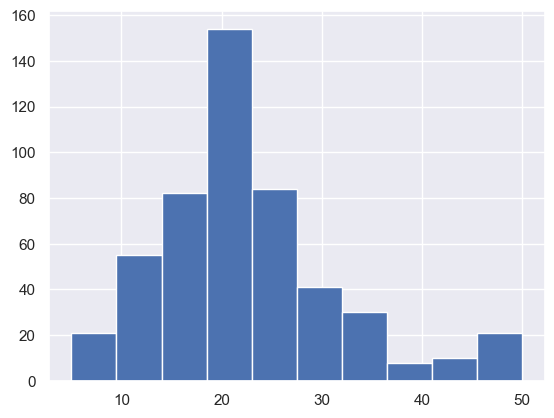

In [56]:
plt.hist(housing_df['MEDV'])
plt.show()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Median Boston Housing Prices')

Text(0.5, 0, '1980 Median Value in Thousands')

Text(0, 0.5, 'Count')

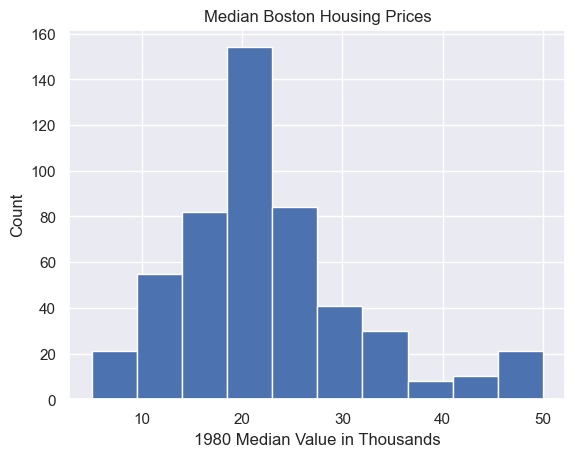

In [57]:
plt.hist(housing_df['MEDV'])
plt.title('Median Boston Housing Prices')
plt.xlabel('1980 Median Value in Thousands')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Median Boston Housing Prices')

Text(0.5, 0, '1980 Median Value in Thousands')

Text(0, 0.5, 'Count')

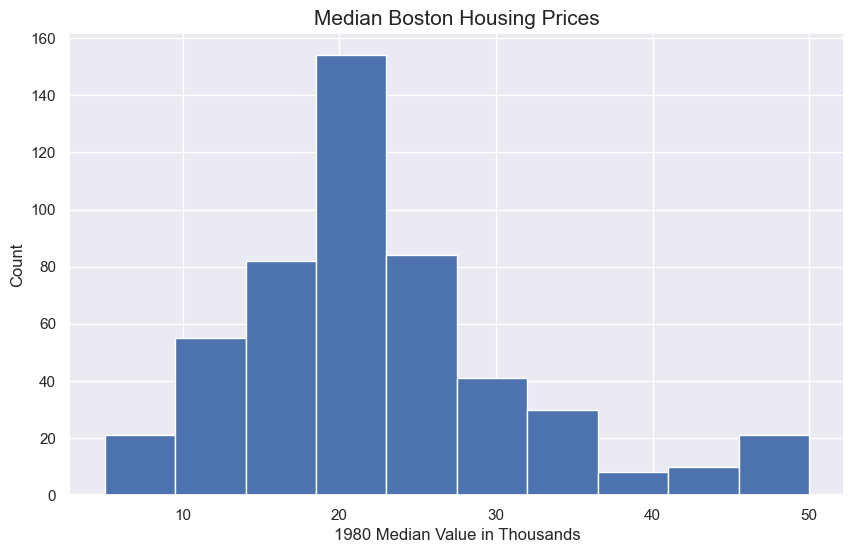

In [58]:
title = 'Median Boston Housing Prices'
plt.figure(figsize=(10,6))
plt.hist(housing_df['MEDV'])
plt.title(title, fontsize=15)
plt.xlabel('1980 Median Value in Thousands')
plt.ylabel('Count')
plt.savefig(title, dpi=300)
plt.show()

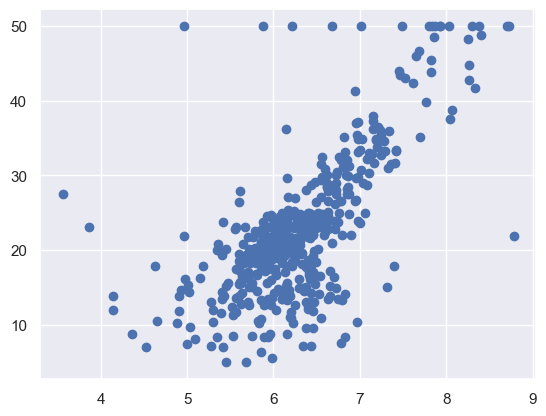

In [59]:
x = housing_df['RM']
y = housing_df['MEDV']
plt.scatter(x, y)
plt.show()

In [60]:
housing_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417,-0.383895
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838,0.362292
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508,-0.476394
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279,0.183844
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040,-0.427321
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323,0.695360
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022,-0.377572
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244,0.249929
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765,-0.381626
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156,-0.468536


<Figure size 800x600 with 0 Axes>

<Axes: >

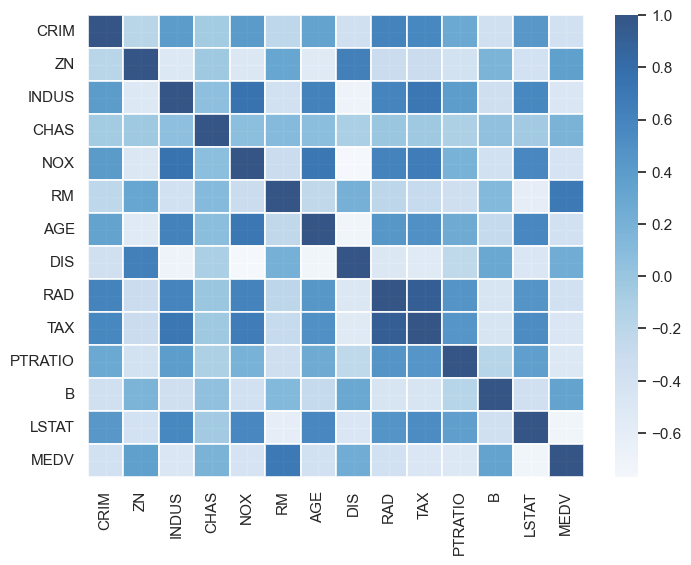

In [61]:
corr = housing_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, xticklabels=corr.columns.values,
yticklabels=corr.columns.values, cmap="Blues", linewidths=1.25, alpha=0.8)
plt.show()

<Axes: ylabel='MEDV'>

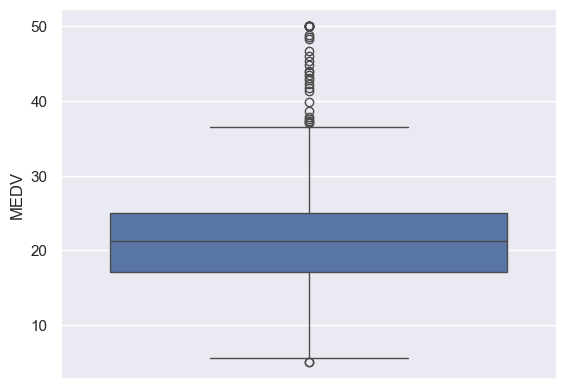

In [62]:
x = housing_df['RM']
y = housing_df['MEDV']
sns.boxplot(y)
plt.show()

<Axes: ylabel='MEDV'>

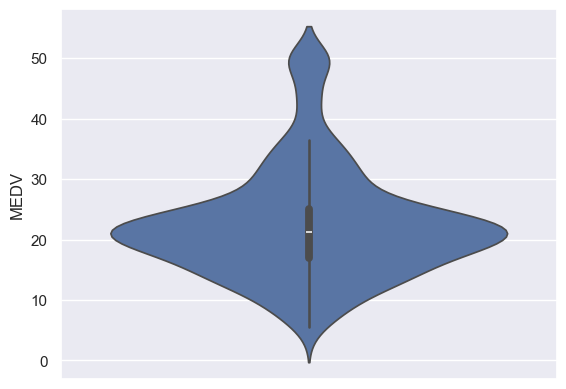

In [63]:
sns.violinplot(y)
plt.show()

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='RM', ylabel='MEDV'>

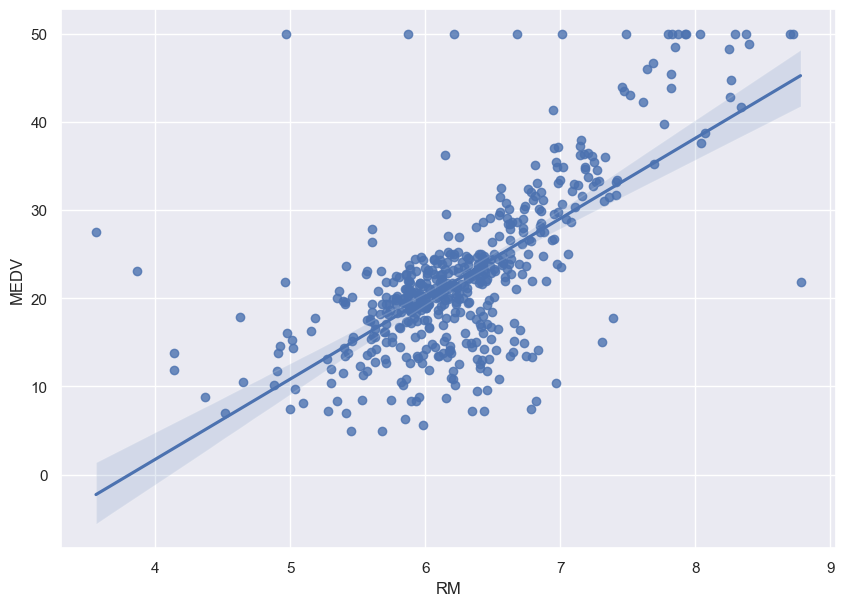

In [64]:
plt.figure(figsize=(10, 7))
sns.regplot(x='RM',y='MEDV',data=housing_df)
plt.show()

In [65]:
x = housing_df['RM']
y = housing_df['MEDV']
X = sm.add_constant(x)
model = sm.OLS(y, X)
est = model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.49e-74
Time:                        13:17:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

There’s a lot of important information in this table. The first is the value of R^2 at 0.484. This suggests that 48% of the data can be explained by the regression line. The second is the coefficient constant of -34.6706. This is the y-intercept. The third is the RM coefficient of 9.1021. This suggests that for every one-bedroom increase, the value of the house increased by 9,102 (keep in mind that this dataset is from 1980).

The standard error suggests how far off the actual values are from the line on average, and the numbers underneath the [0.025 0.975] column give the 95% confidence interval of the value, meaning statsmodel is 95% confident that the true increase in the value of the average house for every one-bedroom increase is between 8,279 and 9,925.

You began our introduction to data analysis with **NumPy**, Python's incredibly fast library for handling massive matrix computations. Next, you learned about the fundamentals of **pandas**, Python's library for handling DataFrames. Taken together, you used NumPy and pandas to analyze the Boston Housing dataset, which included descriptive statistical methods and Matplotlib and Seaborn's graphical libraries. You also learned about advanced methods for creating clean, clearly labeled, publishable graphs.

In [69]:
class_df = pd.DataFrame({'David': [85, 95, 91],
           'Amanda': [90, 91, 88],
           'John': [83, 90, 89]})
class_df = class_df.T
class_df.columns = ['Quiz_1', 'Quiz_2', 'Quiz_3']
ralph_df = pd.DataFrame({'Quiz_1':[np.nan], 'Quiz_2':[78], 'Quiz_3': [np.nan]}, index=['Ralph'])
class_df = pd.concat([class_df,ralph_df])
class_df['Quiz_4'] = [85,92,61,72]
class_df.head()

,Quiz_1,Quiz_2,Quiz_3,Quiz_4
David,85.0,95,91.0,85
Amanda,90.0,91,88.0,92
John,83.0,90,89.0,61
Ralph,NaN,78,NaN,72


In [70]:
class_df = pd.DataFrame({'David': [85, 95, 91],
           'Amanda': [90, 91, 88],
           'John': [83, 90, 89]})
class_df = class_df.T
class_df.columns = ['Quiz_1', 'Quiz_2', 'Quiz_3']
class_df['Quiz_Sum'] = class_df.sum(axis=1)
class_df.head()

,Quiz_1,Quiz_2,Quiz_3,Quiz_Sum
David,85,95,91,271
Amanda,90,91,88,269
John,83,90,89,262


In [106]:
class_df = pd.DataFrame({'David': [85, 95, 91],
           'Amanda': [90, 91, 88],
           'John': [83, 90, 89]})
class_df = class_df.T
class_df.columns = ['Quiz_1', 'Quiz_2', 'Quiz_3']
class_df = class_df.drop(columns=['Quiz_1'])
class_df = class_df.drop(index=['Amanda'])
class_df['0'] = class_df.mean(axis =1)
class_df = class_df.drop(columns = ['Quiz_2', 'Quiz_3'])

class_df.ndim

2

(array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 4., 1., 1.,
        2., 5., 4., 2., 2., 4., 0., 3., 2., 5., 3., 5., 3., 1., 3., 1., 1.,
        3., 5., 0., 2., 1., 0., 1., 0., 2., 1., 0., 1., 0., 0., 0., 1.]),
 array([0.46384514, 0.46521427, 0.4665834 , 0.46795253, 0.46932167,
        0.4706908 , 0.47205993, 0.47342906, 0.4747982 , 0.47616733,
        0.47753646, 0.47890559, 0.48027472, 0.48164386, 0.48301299,
        0.48438212, 0.48575125, 0.48712039, 0.48848952, 0.48985865,
        0.49122778, 0.49259692, 0.49396605, 0.49533518, 0.49670431,
        0.49807344, 0.49944258, 0.50081171, 0.50218084, 0.50354997,
        0.50491911, 0.50628824, 0.50765737, 0.5090265 , 0.51039564,
        0.51176477, 0.5131339 , 0.51450303, 0.51587216, 0.5172413 ,
        0.51861043, 0.51997956, 0.52134869, 0.52271783, 0.52408696,
        0.52545609, 0.52682522, 0.52819435, 0.52956349, 0.53093262,
        0.53230175]),
 <BarContainer object of 50 artists>)

Text(0.5, 1.0, 'Histogram of arrmean Values')

Text(0.5, 0, 'Mean Values')

Text(0, 0.5, 'Frequency')

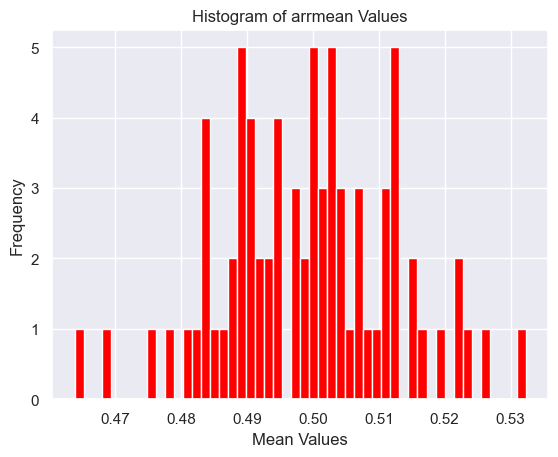

In [101]:
arr = np.random.rand(100000)
arr2 = arr.reshape(-1, 200)
arr3 = arr2[:, np.arange(0, 149, 2)]
arrmean = arr3.mean(axis=0)
import matplotlib.pyplot as plt

plt.hist(arrmean, bins=50, alpha=1, color='red')
plt.title('Histogram of arrmean Values')
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.show()


In [110]:
import numpy as np
a = np.array([1, 5, 10])
b = np.append(a, ['dog','cat','fish'])
b.dtype

dtype('<U21')